In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from highlight_text import fig_text

from mplsoccer import PyPizza, add_image
from PIL import Image
import requests
from io import BytesIO

In [2]:
df1 = pd.read_csv('../data/players_fifa23.csv')
df2 = pd.read_csv('../data/players_distance_vr_1.csv')

Limpiamos un poco las columnas con acentos raros, para que el buscador sea más ágil

In [3]:
def replace_accents(df:pd.DataFrame, cols:list=None)->pd.DataFrame:
    if cols:
        df = df[cols]
        for c in df.columns:
            if 'Total' in c:
                df = df.rename(columns={c:c.split('Total')[0]})
        
        df = df.replace(['á','é','í','ó','ú','à','è','ì','ò','ù','ä','ë','ï','ö','ü','š','ć','ý'],
                  ['a','e','i','o','u','a','e','i','o','u','a','e','i','o','u','s','c','y'], 
                  regex=True)
    else:
        df = df.replace(['á','é','í','ó','ú','à','è','ì','ò','ù','ä','ë','ï','ö','ü','š','ć','ý'],
                  ['a','e','i','o','u','a','e','i','o','u','a','e','i','o','u','s','c','y'], 
                  regex=True)
        pass
    return df

In [4]:
def rename_cols(df:pd.DataFrame, cols:list=None)->pd.DataFrame:
    if cols:
        
        df = df[cols]
        for c in df.columns:
            if 'Total' in c:
                df = df.rename(columns={c:c.split('Total')[0]})
    else:
        
        pass
    
    return df

Seleccionamos las columnas que nos interesan

In [6]:
cols = ['ID', 'Name', 'FullName','Nationality','BestPosition', 'Club', 'NationalTeam', 'PreferredFoot', 
        'Age', 'Height', 'Weight','Overall', 'Potential', 'Growth', 'PaceTotal','ShootingTotal','PassingTotal',
        'DribblingTotal','DefendingTotal','PhysicalityTotal', 'Crossing', 'Finishing','BallControl', 
        'Acceleration', 'SprintSpeed', 'Agility','Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 
        'Strength','Aggression', 'Interceptions', 'Positioning', 'Vision','Penalties', 'Composure', 'Marking', 
        'StandingTackle', 'SlidingTackle','GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
        'GKRating', 'PhotoUrl']

In [7]:
df1 = rename_cols(df1, cols)
df1.head()

,ID,Name,FullName,Nationality,BestPosition,Club,NationalTeam,PreferredFoot,Age,Height,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GKRating,PhotoUrl
0,158023,L. Messi,Lionel Messi,Argentina,CAM,Paris Saint-Germain,Argentina,Left,35,169,...,20,35,24,6,11,15,14,8,22,https://cdn.sofifa.net/players/158/023/23_60.png
1,165153,K. Benzema,Karim Benzema,France,CF,Real Madrid CF,France,Right,34,185,...,43,24,18,13,11,5,5,7,21,https://cdn.sofifa.net/players/165/153/23_60.png
2,188545,R. Lewandowski,Robert Lewandowski,Poland,ST,FC Barcelona,Poland,Right,33,185,...,35,42,19,15,6,12,8,10,22,https://cdn.sofifa.net/players/188/545/23_60.png
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,CM,Manchester City,Belgium,Right,31,181,...,68,65,53,15,13,5,10,13,24,https://cdn.sofifa.net/players/192/985/23_60.png
4,231747,K. Mbappé,Kylian Mbappé,France,ST,Paris Saint-Germain,France,Right,23,182,...,26,34,32,13,5,7,11,6,21,https://cdn.sofifa.net/players/231/747/23_60.png


In [8]:
df1[df1.Name.str.contains('Haal')]

,ID,Name,FullName,Nationality,BestPosition,Club,NationalTeam,PreferredFoot,Age,Height,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GKRating,PhotoUrl
21,239085,E. Haaland,Erling Haaland,Norway,ST,Manchester City,Norway,Left,21,195,...,44,53,29,7,14,13,11,7,22,https://cdn.sofifa.net/players/239/085/23_60.png


In [7]:
df2 = replace_accents(df2)

Vamos a construir el código para mostrar los pizza plots, mas documentación en : https://mplsoccer.readthedocs.io/en/latest/gallery/pizza_plots/plot_pizza_comparison.html#sphx-glr-gallery-pizza-plots-plot-pizza-comparison-py

Parametrizamos los nombres de los jugadores para que posteriormente podamos encapsular nuestro código

In [12]:
def open_image_internet(url_adress):
    response = requests.get(url_adress) # Send http request to the url adress
    
    # Make sure everything went right
    if response.status_code == 200:
        image_bytes = BytesIO(response.content) # Get content 
        image = Image.open(image_bytes) # Open the image
        return image # Output
    else:
        print("Failed to download image:", response.status_code)

In [9]:
def plot_pizza_chart_comparison(df, player1, player2, params=None, params_offset=None)->PyPizza:
    
    # parameter and values list
    if params:
        params = params
    else:
        params = [
            'Potential', 'Growth', 'Acceleration', 'SprintSpeed', 'Agility','Pace', 'Physicality',
            'Shooting', 'Passing', 'Dribbling', 'Finishing','BallControl', 'Defending', 'Crossing',
        ]

    values = [v for v in df[df.Name.str.contains(player1)][params].values[0]]  
    values_2 = [v for v in df[df.Name.str.contains(player2)][params].values[0]]
    
    # pass True in that parameter-index whose values are to be adjusted
    # here True values are passed for "\nTouches\nper Turnover" and "pAdj\nPress Regains" params
    params_offset = [True if abs(values[i]-values_2[i]) < 7 else False for i in range(len(values))]

    # instantiate PyPizza class
    baker = PyPizza(
        params=params,                  # list of parameters
        background_color="#EBEBE9",     # background color
        straight_line_color="#222222",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        last_circle_color="#222222",    # color of last circle
        other_circle_ls="-.",           # linestyle for other circles
        other_circle_lw=1               # linewidth for other circles
    )

    # plot pizza
    fig, ax = baker.make_pizza(
        values,                     # list of values
        compare_values=values_2,    # comparison values
        figsize=(12, 12),             # adjust figsize according to your need
        kwargs_slices=dict(
            facecolor="#1A78CF", edgecolor="#222222",
            zorder=2, linewidth=1
        ),                          # values to be used when plotting slices
        kwargs_compare=dict(
            facecolor="#FF9300", edgecolor="#222222",
            zorder=2, linewidth=1,
        ),
        kwargs_params=dict(
            color="#000000", fontsize=12,
            va="center"
        ),                          # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        ),                          # values to be used when adding parameter-values labels
        kwargs_compare_values=dict(
            color="#000000", fontsize=12, 
            zorder=3,
            bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
        ),                          # values to be used when adding parameter-values labels
    )
    
    # adjust text for comparison-values-text
    baker.adjust_texts(params_offset, offset=-25.0, adj_comp_values=True)
    
    # add title
    fig_text(
        0.515, 0.99, f"<{player1}> vs <{player2}>", size=17, fig=fig,
        highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
        ha="center", 
        color="#000000"
    )
    
    # add subtitle
    fig.text(
        0.515, 0.942,
        "Percentile Rank | Season 2022-23",
        size=15,
        ha="center", 
        color="#000000"
    )
    
    # add credits
    CREDIT_1 = "data: Fifa 23 from kaggle"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
    
    fig.text(
        0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
        color="#000000",
        ha="right"
    )
    
    ## Add players photo to plot
    photo_p1 = df[df.Name == player1]['PhotoUrl'].values[0]
    photo_p2 = df[df.Name == player2]['PhotoUrl'].values[0]
    
    image1 = open_image_internet(photo_p1)
    image2 = open_image_internet(photo_p2)
    
    # Define the position and size parameters for first photo
    image1_xaxis = 0
    image1_yaxis = 0.85
    image1_width = 0.15
    image1_height = 0.15  # Same as width since our logo is a square

    # Define the position for the image axes for first image
    ax_image1 = fig.add_axes([image1_xaxis,
                             image1_yaxis,
                             image1_width,
                             image1_height]
                           )

    # Display the image for first image
    ax_image1.imshow(image1)
    ax_image1.axis('off')  # Remove axis of the image
    
    # Define the position and size parameters for second image
    image2_xaxis = 0.85
    image2_yaxis = 0.85
    image2_width = 0.15
    image2_height = 0.15  # Same as width since our logo is a square

    # Define the position for the image axes for second image
    ax_image2 = fig.add_axes([image2_xaxis,
                             image2_yaxis,
                             image2_width,
                             image2_height]
                           )

    # Display the image for second image
    ax_image2.imshow(image2)
    ax_image2.axis('off')  # Remove axis of the image
    
    
    
    plt.savefig(f'images/{player1}_vs_{player2}.png')
    
    plt.show()
    

In [10]:
player1 = 'H. Kane'
player2 = 'E. Haaland'

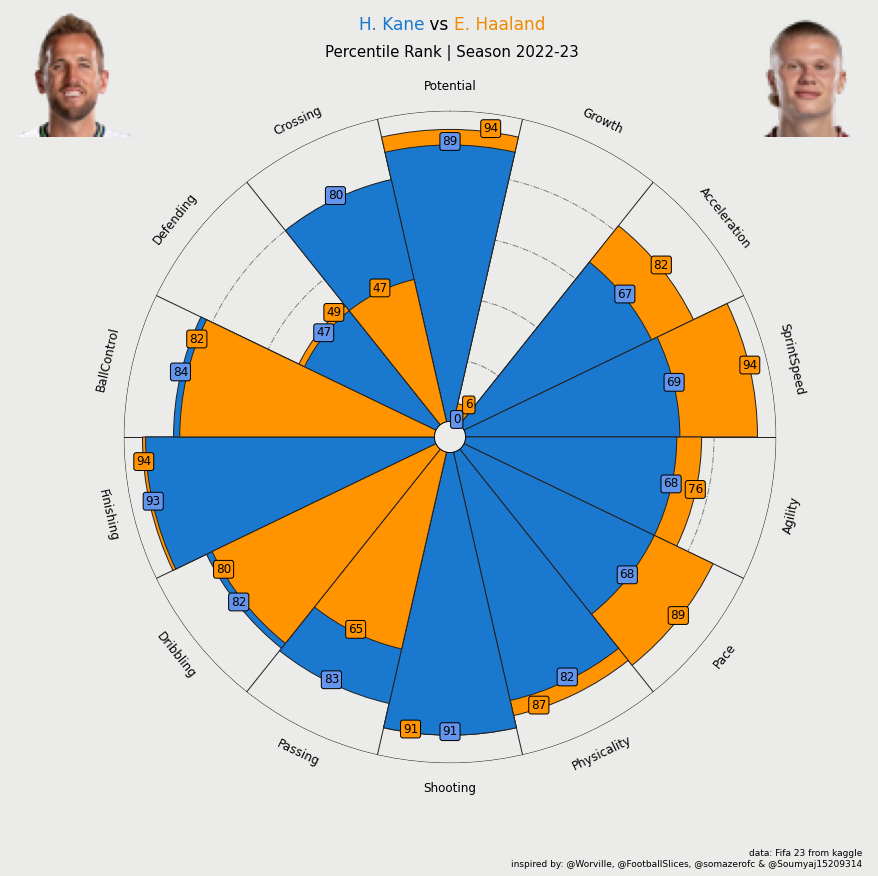

In [13]:
plot_pizza_chart_comparison(df1, player1, player2)

In [15]:
def plot_player_info(df, player, params=None):

    df = df[df.Name.str.contains(player)]
    
    # parameter and values list
    if params:
        params = params
    else:
        params = [
            'Potential', 'Growth', 'Acceleration', 'SprintSpeed', 'Agility','Pace', 'Physicality',
            'Shooting', 'Passing', 'Dribbling', 'Finishing','BallControl', 'Defending', 'Crossing',
        ]

    values = [v for v in df[params].values[0]] 
    
    # color for the slices and text
    slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 5 + ["#D70232"] * 2
    text_colors =  ["#F2F2F2"] * 14

    if len(values) != len(slice_colors):
        physics = int(input('Tape physics stats number: '))
        attacking = int(input('Tape attacking stats number: '))
        defending = int(input('Tape defending stats number: '))

        slice_colors = ["#1A78CF"] * physics  + ["#FF9300"] * attacking + ["#D70232"] * defending
        total = physics + attacking + defending
        text_colors =  ["#F2F2F2"] * total
        
    # instantiate PyPizza class
    baker = PyPizza(
        params=params,                  # list of parameters
        background_color="#222222",     # background color
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_color="#000000",    # color for last line
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=0,              # linewidth for other circles
        inner_circle_size=20            # size of inner circle
    )
    
    # plot pizza
    fig, ax = baker.make_pizza(
        values,                          # list of values
        figsize=(8, 8.5),                # adjust the figsize according to your need
        color_blank_space="same",        # use the same color to fill blank space
        slice_colors=slice_colors,       # color for individual slices
        value_colors=text_colors,        # color for the value-text
        value_bck_colors=slice_colors,   # color for the blank spaces
        blank_alpha=0.4,                 # alpha for blank-space colors
        kwargs_slices=dict(
            edgecolor="#000000", zorder=2, linewidth=1
        ),                               # values to be used when plotting slices
        kwargs_params=dict(
            color="#F2F2F2", fontsize=11,
            va="center"
        ),                               # values to be used when adding parameter labels
        kwargs_values=dict(
            color="#F2F2F2", fontsize=11,
            zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                                # values to be used when adding parameter-values labels
    )
    
    # add title
    fig.text(
        0.515, 0.975, f"{df['Name'].values[0]} - {df['Club'].values[0]}", size=16,
        ha="center", color="#F2F2F2"
    )
    
    # add subtitle
    fig.text(
        0.515, 0.955,
        "Season 2022-23",
        size=13,
        ha="center", 
        color="#F2F2F2"
    )
    
    # add credits
    CREDIT_1 = "data: FiFa 23 kaggle"
    CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
    
    fig.text(
        0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
        color="#F2F2F2",
        ha="right"
    )
    
    # add text
    fig.text(
        0.34, 0.93, "Physics        Attacking       Defending", size=14,
        color="#F2F2F2"
    )
    
    # add rectangles
    fig.patches.extend([
        plt.Rectangle(
            (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
            transform=fig.transFigure, figure=fig
        ),
        plt.Rectangle(
            (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
            transform=fig.transFigure, figure=fig
        ),
        plt.Rectangle(
            (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
            transform=fig.transFigure, figure=fig
        ),
    ])
    
    # Add players photo to plot
    photo_p = df[df.Name == player]['PhotoUrl'].values[0]

    image1 = open_image_internet(photo_p)

    # add image
    ax_image = add_image(
        image1, fig, left=0.45, bottom=0.45, width=0.12, height=0.12
    )  # these values might differ when you are plotting
    
    plt.savefig(f'images/{player}_info.png')
    
    plt.show()

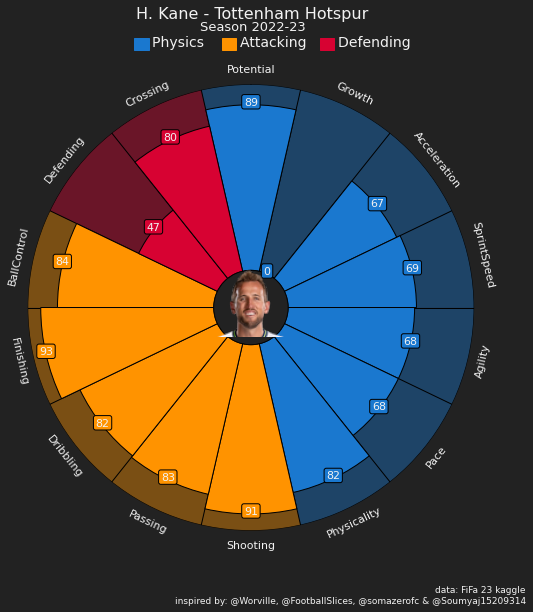

In [16]:
plot_player_info(df1, player1)